1. Измените функцию `calc_logloss` так, чтобы нули по возможности не попадали в `np.log` (как вариант - использовать `np.clip` или `np.where`).  
2. На данных из урока изучите влияние гиперпараметров на ошибку алгоритма. 
3. Создайте функцию `calc_pred_proba`, возвращающую предсказанную вероятность класса "1". На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`.
4. Создайте функцию `calc_pred`, возвращающую предсказанные классы (0 или 1). На вход функции подаются значения признаков Х и веса, которые уже посчитаны функцией `eval_LR_model`, а также порог вероятности.
5. (\*) Напишите функции для расчета accuracy, матрицы ошибок, precision и recall, а также F1-score.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline
plt.style.use('seaborn-ticks')
plt.rcParams.update({'font.size': 14})

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

**задача №1**

In [4]:
def calc_logloss(y, p, e=1e-16):
    p = np.clip(p, e, 1 - e)  # избавляемся от р равных 0 или 1
    err = np.mean(- y * np.log(p) - (1.0 - y) * np.log(1.0 - p))
    return err

In [5]:
# логистическая регрессия
def eval_LR_model(X, y, iterations, eta=1e-4, debug=False):
    np.random.seed(42)
    w = np.random.randn(X.shape[1])
    n = X.shape[0]
    for i in range(1, iterations + 1):
        z = np.dot(X, w) # log(p/(1-p))
        pred = sigmoid(z) # p [0, 1]
        w -= eta * (1/n * np.dot((pred - y), X))
        err = calc_logloss(y, sigmoid(np.dot(X, w)))
        if debug and i % (iterations / 10) == 0:
            print(i, w, err)
    return w, err

**задача №3**

In [6]:
def calc_pred_proba(X, w):
    return sigmoid(np.dot(X, w))

**задача №4**

In [7]:
def calc_pred(X, w, t=0.5):
    return np.where(calc_pred_proba(X, w) > t, 1, 0)

**задача №5**

In [8]:
def accuracy(pred, y):
    assert len(pred) == len(y)
    return (np.sum(pred == y)) / len(pred)


def error_matrix(pred, y):
    assert len(pred) == len(y)
    
    err_matrix = [[0, 0], [0, 0]]
    
    for i in range(len(y)):
        if pred[i] == 1:
            if y[i] == 1:
                err_matrix[0][0] += 1  # TP
            else:
                err_matrix[0][1] += 1  # FP
        else:
            if y[i] == 1:
                err_matrix[1][0] += 1  # FN
            else:
                err_matrix[1][1] += 1  # TN
    
    # красивее, но требуется больше вычислений и ресурсов
    #TP = np.sum(np.where(((y == 1) & (pred == 1)), 1, 0))
    #FP = np.sum(np.where(((y == 0) & (pred == 1)), 1, 0))
    #FN = np.sum(np.where(((y == 1) & (pred == 0)), 1, 0))
    #TN = np.sum(np.where(((y == 0) & (pred == 0)), 1, 0))
    
    return err_matrix  #, TP, FP, FN, TN


def precision(pred, y):
    err_matrix = error_matrix(pred, y)
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[0][1])  #precision = (TP)/(TP+FP)


def recall(pred, y):
    err_matrix = error_matrix(pred, y)
    return err_matrix[0][0] / (err_matrix[0][0] + err_matrix[1][0])  #recall = (TP)/(TP+FN)


def f1_score(pred, y):
    pr = precision(pred, y)
    rc = recall(pred, y)
    return (2. * pr * rc) / (pr + rc)  #f1 = 2*(( precision * recall_score)/( precision + recall_score))

In [9]:
X = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [1, 1, 2, 1, 3, 0, 5, 10, 1, 2],  # стаж репетитора
              [500, 700, 750, 600, 1450,        # средняя стоимость занятия
               800, 1500, 2000, 450, 1000],
              [21, 25, 27, 20, 25, 18, 35, 60, 20, 30]],  # возраст репетитора
              dtype = np.float64).T 

y = np.array([0, 0, 0, 1, 1, 1, 1, 0, 0, 0]) # подходит или нет репетитор

In [10]:
def standardization(X):
    S = (X - X.mean(axis=0)) / X.std(axis=0)
    return S

X_st = X.copy()
X_st[:, 1:] = standardization(X[:, 1:])

In [11]:
w, err = eval_LR_model(X_st, y, iterations=100, eta=0.1, debug=True)

10 [ 0.36065583 -0.3972585   0.51937535  1.19161524] 0.972199021173242
20 [ 0.215788   -0.61251766  0.44159174  0.90102578] 0.8152129340815597
30 [ 0.08277136 -0.76559453  0.42551123  0.67107078] 0.7212678942568461
40 [-0.02507329 -0.85541749  0.46585326  0.50463174] 0.6722796074198796
50 [-0.10912684 -0.90576455  0.53830407  0.37884616] 0.6416699927595096
60 [-0.17469927 -0.93640342  0.62421319  0.27424279] 0.6181685428656378
70 [-0.22617113 -0.95733883  0.71436092  0.18090474] 0.5982903907109157
80 [-0.26681997 -0.97319728  0.80460517  0.09421158] 0.5807656397146188
90 [-0.29911987 -0.98614533  0.89312045  0.01196478] 0.5649873364632753
100 [-0.32495521 -0.99723356  0.97913034 -0.06693668] 0.5506011060815837


In [12]:
pred = calc_pred(X_st, w)
print('prob =', calc_pred_proba(X_st, w).round(2))
print('true =', y)
print('pred =', pred)

prob = [0.34 0.43 0.36 0.39 0.62 0.58 0.46 0.25 0.32 0.48]
true = [0 0 0 1 1 1 1 0 0 0]
pred = [0 0 0 0 1 1 0 0 0 0]


In [13]:
accuracy(pred, y)

0.8

In [14]:
error_matrix(pred, y)

[[2, 0], [2, 6]]

In [15]:
precision(pred, y)

1.0

In [16]:
recall(pred, y)

0.5

In [17]:
f1_score(pred, y)

0.6666666666666666

**задача №2**

фиксируем кол-во итераций и анализируем влияние $\eta$ на ошибку

In [18]:
etas = np.logspace(-5, 3, 20)
examples = [[eval_LR_model(X_st, y, iterations=iters, eta=_eta)[1] for _eta in etas] for iters in (100, 200, 500)]

C:\Work\Anaconda\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


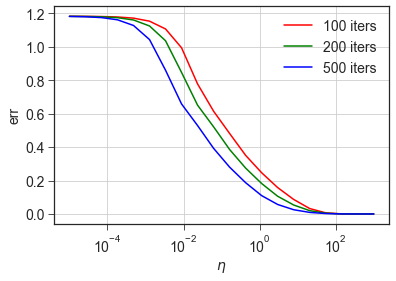

In [19]:
plt.plot(etas, examples[0], 'r', label='100 iters')
plt.plot(etas, examples[1], 'g', label='200 iters')
plt.plot(etas, examples[2], 'b', label='500 iters')
plt.xscale('log')
plt.xlabel(r'$\eta$')
plt.ylabel('err')
plt.grid()
plt.legend();

**Выводы:** чем больше $\eta$, тем меньше итераций необходимо для достижения минимальной ошибки. Также при большем количестве итераций достигается меньшая ошибка.

In [20]:
w, err = eval_LR_model(X_st, y, iterations=10, eta=100, debug=True)

1 [-12.2462847  -27.67474989 -14.23020126 -33.111856  ] 15.55213652010897
2 [-31.92199391   1.54147351  37.1766538  -13.34215841] 8.667869973155536
3 [-20.49306403 -38.66416413   6.24236592 -55.26099863] 11.682770485259807
4 [-30.54413726 -11.52844912  53.11018982 -36.38621833] 4.884710688608184
5 [ -0.67632048 -18.06175687  52.45842391 -46.10114081] 0.05165190654901323
6 [  0.40646806 -19.29201562  50.20778815 -48.31260725] 0.041829261593370456
7 [ -3.01678764 -18.51603518  50.10046006 -48.82702883] 0.008772211797026298
8 [ -2.42065681 -18.88135118  49.56217957 -49.32852707] 0.004127344088153626
9 [ -2.4672306  -18.89644754  49.46398595 -49.45368939] 0.003874473117702437
10 [ -2.51201649 -18.89811439  49.38811519 -49.55995971] 0.0036993321854787544


При $\eta = 100$ алгоритм достиг минимальной ошибки уже за первые 10 итераций

In [21]:
pred = calc_pred(X_st, w)
print('prob =', calc_pred_proba(X_st, w).round(2))
print('true =', y)
print('pred =', pred)

prob = [0.   0.   0.   0.99 1.   1.   1.   0.   0.   0.02]
true = [0 0 0 1 1 1 1 0 0 0]
pred = [0 0 0 1 1 1 1 0 0 0]


In [22]:
# тест для p = 0 или 1
calc_logloss(0, 0), calc_logloss(0, 1)

(1.1102230246251565e-16, 36.7368005696771)